<a href="https://colab.research.google.com/github/seunghy1468/Sparta_Coding_Machine_Learning/blob/main/homework_3_weeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 숫자 MNIST 분석 (손글씨)
# 머신러닝에서 가장 유명한 MNIST dataset

import os
os.environ['KAGGLE_USERNAME'] = ''  # username
os.environ['KAGGLE_KEY'] = ''       # key

!kaggle datasets download -d oddrationale/mnist-in-csv
!unzip mnist-in-csv.zip

 66% 10.0M/15.2M [00:00<00:00, 101MB/s]
100% 15.2M/15.2M [00:00<00:00, 97.4MB/s]
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')
train_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


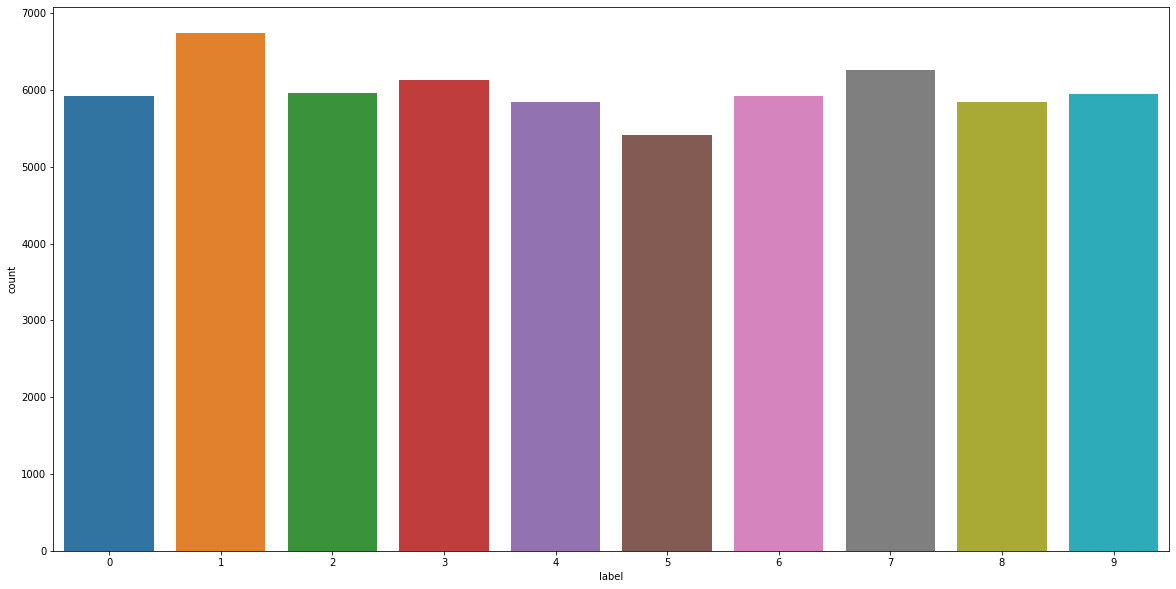

In [5]:
# 0부터 9까지 대략 6000~7000개 사이의 dataset이 있다
plt.figure(figsize=(20,10))
sns.countplot(train_df['label'])
plt.show()

In [7]:
# 전처리
train_df = train_df.astype(np.float32)
x_train = train_df.drop(columns=['label'], axis=1).values
y_train = train_df[['label']].values

test_df = test_df.astype(np.float32)
x_test = test_df.drop(columns=['label'], axis=1).values
y_test = test_df[['label']].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# training set: 60000
# test set: 10000
# pixel 수: 784
# 결과 값: 1

(60000, 784) (60000, 1)
(10000, 784) (10000, 1)


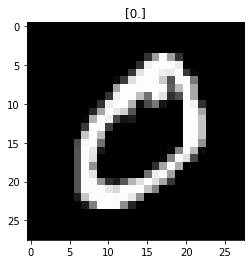

In [8]:
index = 1
plt.title(str(y_train[index]))
plt.imshow(x_train[index].reshape((28, 28)), cmap='gray')
plt.show()

In [9]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

# 결과 값: 10개 (0~9)
print(y_train.shape)

(60000, 10)


In [10]:
x_train = x_train / 255.
x_test = x_test / 255.

In [11]:
input = Input(shape=(784,))
hidden = Dense(256, activation='relu')(input)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(1024, activation='relu')(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(256, activation='relu')(hidden)
output = Dense(10, activation='softmax')(hidden)

model = Model(inputs=input, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
    epochs=20                         # epochs 복수형으로 쓰기!
)

Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2421 - acc: 0.9302 - val_loss: 0.1566 - val_acc: 0.9558
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1217 - acc: 0.9673 - val_loss: 0.1063 - val_acc: 0.9711
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0908 - acc: 0.9748 - val_loss: 0.0928 - val_acc: 0.9751
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736 - acc: 0.9806 - val_loss: 0.0948 - val_acc: 0.9762
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - acc: 0.9833 - val_loss: 0.0908 - val_acc: 0.9766
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0550 - acc: 0.9852 - val_loss: 0.0977 - val_acc: 0.9747
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0485 - acc: 0.9871 - val_loss: 0.0904 - val_acc: 0.9780
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

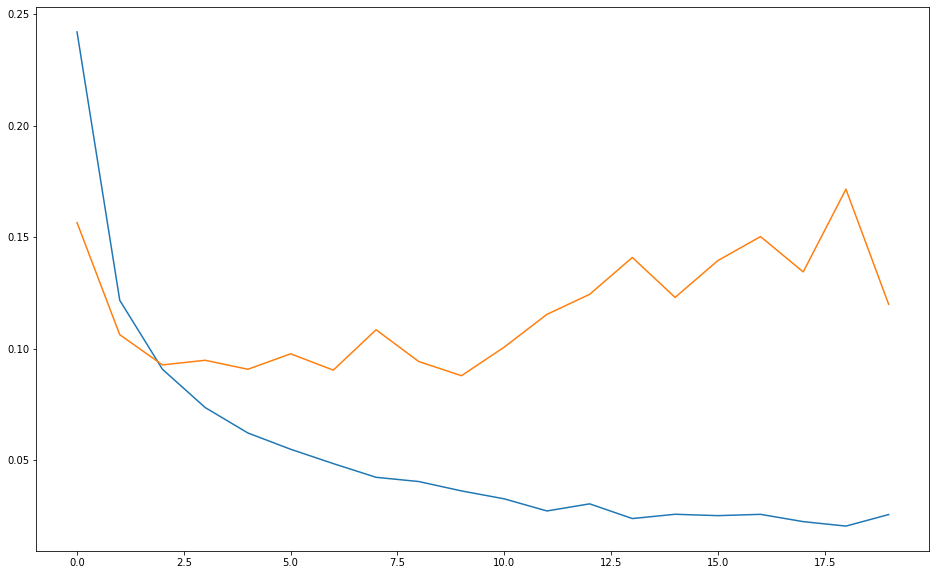

In [13]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

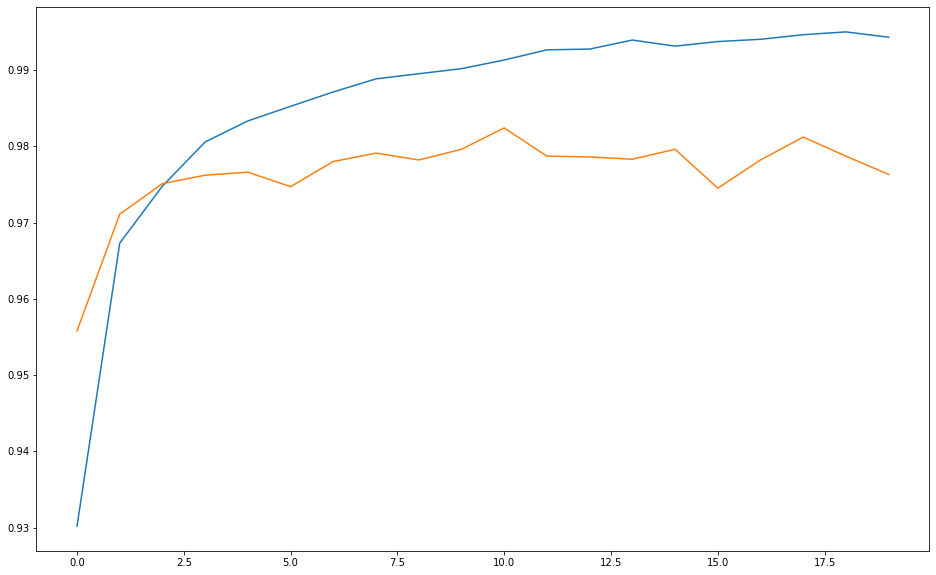

In [14]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# val_acc 값의 추이를 볼 때, 97% 정도의 높은 확률로 인식하는 모델을 설계